# Getting vector coordinates for p5.js
As in p5.js the data structures are coded in the other way as in Python. I structured code here to easity make a transition in order to gain an aim.

In [1]:
import json
import os
import pandas as pd
import numpy as np
from toolz.functoolz import compose
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [20]:
final_list_prev_x_y = {0: (441.2099609375, 568.099365234375), 1: (452.9404602050781, 556.368896484375), \
                       2: (441.2099609375, 562.234130859375), 3: (488.1319580078125, 562.234130859375), \
                       4: (447.0751953125, 562.234130859375), 5: (517.4581909179688, 620.8865966796875), \
                       6: (447.0751953125, 632.6171264648438), 7: (593.7064208984375, 656.078125), \
                       8: (429.4794616699219, 714.7305908203125), 9: (664.0894165039062, 673.6738891601562), \
                       10: (388.4226989746094, 773.3831176757812), 11: (511.59295654296875, 773.3831176757812), \
                       12: (464.67095947265625, 779.2483520507812), 13: (482.2666931152344, 908.2838745117188), \
                       14: (388.4226989746094, 896.5533447265625), 15: (499.8624572753906, 1037.3193359375), \
                       16: (318.0397033691406, 990.3973388671875)}
final_list_cur_x_y = {0: (453.73431396484375, 564.3138427734375), 1: (464.7712707519531, 553.2769165039062), 2: (453.73431396484375, 553.2769165039062), 3: (497.882080078125, 564.3138427734375), 4: (464.7712707519531, 564.3138427734375), 5: (530.992919921875, 625.0170288085938), 6: (448.2158508300781, 630.5355224609375), 7: (608.2515258789062, 647.0909423828125), 8: (404.0680847167969, 702.275634765625), 9: (685.5100708007812, 674.6832885742188), 10: (348.8833923339844, 740.9049072265625), 11: (508.9190368652344, 768.497314453125), 12: (464.7712707519531, 779.5342407226562), 13: (525.4744262695312, 900.9406127929688), 14: (431.6604309082031, 895.422119140625), 15: (564.103759765625, 1033.3839111328125), 16: (381.99420166015625, 1016.8284912109375)}


starting_points = {0: (441.2099609375, 568.099365234375), 1: (452.9404602050781, 556.368896484375), 2: (441.2099609375, 562.234130859375), 3: (488.1319580078125, 562.234130859375), 4: (447.0751953125, 562.234130859375), 5: (517.4581909179688, 620.8865966796875), 6: (447.0751953125, 632.6171264648438), 7: (593.7064208984375, 656.078125), 8: (429.4794616699219, 714.7305908203125), 9: (664.0894165039062, 673.6738891601562), 10: (388.4226989746094, 773.3831176757812), 11: (511.59295654296875, 773.3831176757812), 12: (464.67095947265625, 779.2483520507812), 13: (482.2666931152344, 908.2838745117188), 14: (388.4226989746094, 896.5533447265625), 15: (499.8624572753906, 1037.3193359375), 16: (318.0397033691406, 990.3973388671875)}

direction_list = {0: ([12.52435303, -3.78552246]), 1: ([11.83081055, -3.09197998]), 2: ([12.52435303, -8.95721436]), 3: ([9.75012207, 2.07971191]), 4: ([17.69607544,  2.07971191]), 5: ([13.534729  ,  4.13043213]), 6: ([ 1.14065552, -2.081604  ]), 7: ([14.54510498, -8.98718262]), 8: ([-25.41137695, -12.45495605]), 9: ([21.4206543 ,  1.00939941]), 10: ([-39.53930664, -32.47821045]), 11: ([-2.67391968, -4.88580322]), 12: ([0.10031128, 0.28588867]), 13: ([43.20773315, -7.34326172]), 14: ([43.23773193, -1.13122559]), 15: ([64.24130249, -3.9354248 ]), 16: ([63.95449829, 26.43115234])}


We are choosing the coordinates for left_arm:
(524.23, 622.95)
(600.98, 651.58)
(674.8, 674.18)
We are choosing the coordinates for right_arm:
(447.65, 631.58)
(416.77, 708.5)
(368.65, 757.14)
We are choosing the coordinates for left_leg:
(510.26, 770.94)
(503.87, 904.61)
(531.98, 1035.35)
We are choosing the coordinates for right_leg:
(464.72, 779.39)
(410.04, 895.99)
(350.02, 1003.61)
We are choosing the coordinates for head:
(493.01, 563.27)
(458.86, 554.82)
(447.47, 566.21)
(447.47, 557.76)
(455.92, 563.27)


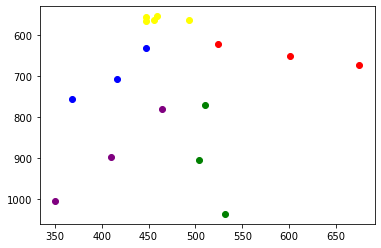

In [48]:
# Test observation of body limbs
# circle = (final_list_prev_x_y)
parts_of_body = {
    'left_arm': (5, 7, 9),
    'right_arm': (6, 8, 10),
    'left_leg':  (11, 13, 15),
    'right_leg': (12, 14, 16),
#     'body': (5, 6, 11, 12), # LSh, RSh, LHip, RHip
    'head': (3, 1, 0, 2, 4) # LEar, LEye, Nose, REye, REar
}

c = ['red', 'blue', 'green', 'purple', 'yellow', 'orange']
fig, ax = plt.subplots()
ax.invert_yaxis()
i = 0
for body_part_k, body_part_v in parts_of_body.items():
    print(f'We are choosing the coordinates for {body_part_k}:')
    for index in body_part_v:
        prev_x, prev_y = final_list_prev_x_y[index][0], final_list_prev_x_y[index][1]
        cur_x, cur_y = final_list_cur_x_y[index][0], final_list_cur_x_y[index][1]
        radius = np.sqrt(direction_list[index][0]**2 + direction_list[index][1]**2)
        circle = ( round((prev_x+cur_x)/2, 2), round((prev_y+cur_y)/2, 2) )
        print(circle)
        ax.scatter(circle[0], circle[1],color=c[i])
    
    circles = []
    i+=1
plt.show()

In [57]:
# Test example of data pipeline output
final_list_prev_x_y = {0: (441.2099609375, 568.099365234375), 1: (452.9404602050781, 556.368896484375), \
                       2: (441.2099609375, 562.234130859375), 3: (488.1319580078125, 562.234130859375), \
                       4: (447.0751953125, 562.234130859375), 5: (517.4581909179688, 620.8865966796875), \
                       6: (447.0751953125, 632.6171264648438), 7: (593.7064208984375, 656.078125), \
                       8: (429.4794616699219, 714.7305908203125), 9: (664.0894165039062, 673.6738891601562), \
                       10: (388.4226989746094, 773.3831176757812), 11: (511.59295654296875, 773.3831176757812), \
                       12: (464.67095947265625, 779.2483520507812), 13: (482.2666931152344, 908.2838745117188), \
                       14: (388.4226989746094, 896.5533447265625), 15: (499.8624572753906, 1037.3193359375), \
                       16: (318.0397033691406, 990.3973388671875)}
final_list_cur_x_y = {0: (453.73431396484375, 564.3138427734375), 1: (464.7712707519531, 553.2769165039062), 2: (453.73431396484375, 553.2769165039062), 3: (497.882080078125, 564.3138427734375), 4: (464.7712707519531, 564.3138427734375), 5: (530.992919921875, 625.0170288085938), 6: (448.2158508300781, 630.5355224609375), 7: (608.2515258789062, 647.0909423828125), 8: (404.0680847167969, 702.275634765625), 9: (685.5100708007812, 674.6832885742188), 10: (348.8833923339844, 740.9049072265625), 11: (508.9190368652344, 768.497314453125), 12: (464.7712707519531, 779.5342407226562), 13: (525.4744262695312, 900.9406127929688), 14: (431.6604309082031, 895.422119140625), 15: (564.103759765625, 1033.3839111328125), 16: (381.99420166015625, 1016.8284912109375)}

final_list_prev_x = {}
final_list_prev_y = {}
final_list_cur_x = {}
final_list_cur_y = {}
for k, v in final_list_prev_x_y.items():
    final_list_prev_x[k] = v[0]
    final_list_prev_y[k] = v[1]
    
for k, v in final_list_cur_x_y.items():
    final_list_cur_x[k] = v[0]
    final_list_cur_y[k] = v[1]

print('var final_list_prev_x = ', final_list_prev_x, ';\n\nvar final_list_prev_y = ', final_list_prev_y, ';\n\nvar final_list_cur_x = ', final_list_cur_x, ';\n\nvar final_list_cur_y = ', final_list_cur_y, ';')





var final_list_prev_x =  {0: 441.2099609375, 1: 452.9404602050781, 2: 441.2099609375, 3: 488.1319580078125, 4: 447.0751953125, 5: 517.4581909179688, 6: 447.0751953125, 7: 593.7064208984375, 8: 429.4794616699219, 9: 664.0894165039062, 10: 388.4226989746094, 11: 511.59295654296875, 12: 464.67095947265625, 13: 482.2666931152344, 14: 388.4226989746094, 15: 499.8624572753906, 16: 318.0397033691406} ;

var final_list_prev_y =  {0: 568.099365234375, 1: 556.368896484375, 2: 562.234130859375, 3: 562.234130859375, 4: 562.234130859375, 5: 620.8865966796875, 6: 632.6171264648438, 7: 656.078125, 8: 714.7305908203125, 9: 673.6738891601562, 10: 773.3831176757812, 11: 773.3831176757812, 12: 779.2483520507812, 13: 908.2838745117188, 14: 896.5533447265625, 15: 1037.3193359375, 16: 990.3973388671875} ;

var final_list_cur_x =  {0: 453.73431396484375, 1: 464.7712707519531, 2: 453.73431396484375, 3: 497.882080078125, 4: 464.7712707519531, 5: 530.992919921875, 6: 448.2158508300781, 7: 608.2515258789062, 8: 

## Generate file with final_list_prev_x, final_list_prev_y, final_list_cur_x, final_list_cur_y

In [97]:
def create_vectors_for_visualisation(df, verbose=False):
    def get_34_vector_pairs(prev_keypoints_from, cur_keypoints_to):
        '''
        We have this structure for each keypont: [x, y, score].
        We are ignoring 'score' field that we get to this vector.
        We are returning the list of 34 elements:
        return: list((prev_x1, cur_x1), (prev_y1, cur_y1), ... (prev_x17, cur_x17), (prev_y17, cur_y17))
        '''
        vectors_to_draw_x_y_coordinates = list(zip(prev_keypoints_from, cur_keypoints_to))
        lst = list(range(51))
        indexes_to_drop = lst[2::3]
        if verbose:
            print('before:', len(vectors_to_draw_x_y_coordinates))
        new_vectors_to_draw_x_y_coordinates = []
        for i, x_y_coord in enumerate(vectors_to_draw_x_y_coordinates):
            if i in indexes_to_drop:
                continue
            new_vectors_to_draw_x_y_coordinates.append(x_y_coord)
        assert len(new_vectors_to_draw_x_y_coordinates) == 34
        if verbose:
            print('after:', len(new_vectors_to_draw_x_y_coordinates))
            print(new_vectors_to_draw_x_y_coordinates)
        return new_vectors_to_draw_x_y_coordinates

    def get_17_vectors(prev_keypoints_from, cur_keypoints_to):
        '''
        After the first function call, we are getting... :
        We are getting this structure:
        list((prev_x1, cur_x1), (prev_y1, cur_y1), ... (prev_x17, cur_x17), (prev_y17, cur_y17))
        
        return: {0: (prev_x1, prev_y1), ... , 16:(prev_x17, prev_y17)},
                (0: (cur_x1, cur_y1), ... ,   16: (cur_x17, cur_y17)  }
        ''' 
        lst_to_reconstruct = get_34_vector_pairs(prev_keypoints_from, cur_keypoints_to)
        prev_x_y = [el[0] for el in lst_to_reconstruct]
        cur_x_y = [el[1] for el in lst_to_reconstruct]
        all_prev_x, all_prev_y = prev_x_y[::2], prev_x_y[1::2]
        all_cur_x, all_cur_y = cur_x_y[::2], cur_x_y[1::2]
        final_d_prev, final_d_cur = {i: el for i, el in enumerate(list(zip(all_prev_x, all_prev_y)))}, \
                                           {i: el for i, el in enumerate(list(zip(all_cur_x, all_cur_y)))}
        return final_d_prev, final_d_cur
        
    def get_prev_cur_x_and_y(final_list_prev_x_y, final_list_cur_x_y):
        final_list_prev_x, final_list_prev_y, final_list_cur_x, final_list_cur_y = {}, {}, {}, {}
        for k, v in final_list_prev_x_y.items():
            final_list_prev_x[k] = v[0]
            final_list_prev_y[k] = v[1]

        for k, v in final_list_cur_x_y.items():
            final_list_cur_x[k] = v[0]
            final_list_cur_y[k] = v[1]
        return final_list_prev_x, final_list_prev_y, final_list_cur_x, final_list_cur_y
    
    def calculate_directions(final_list_prev_x_y, final_list_cur_x_y):
        '''
        Return directions of each keypoint.
        return: [(x1, y1), (x2, y2), ... (x17, y17)]
        '''
        vector_of_17_dir = []
        for i in range(len(final_list_prev_x_y)):
            prev_x, prev_y = final_list_prev_x_y[i][0], final_list_prev_x_y[i][1]
            cur_x, cur_y = final_list_cur_x_y[i][0], final_list_cur_x_y[i][1]
            dir_coord = calc_dir(cur_x, cur_y, prev_x, prev_y)
            vector_of_17_dir.append(dir_coord)
        return vector_of_17_dir
    
    def calc_dir(cur_x, cur_y, prev_x, prev_y):
        return np.array((cur_x, cur_y)) - np.array((prev_x, prev_y))

    path_to_orig_images = '../data/ballet/'
    res_data = []
    # for each row, where we have pairs
    for i in tqdm(df.index):
        row = df.loc[i, :]
        print(f'Going from a frame {row.prev_skeleton_name} to a frame {row.cur__skeleton_name}:')
        prev_keypoints_from = [float(number)for number in row.prev_keypoints_from[1:-1].split(', ')]
        cur_keypoints_to = [float(number)for number in row.cur_keypoints_to[1:-1].split(', ')]
        final_list_prev_x_y, final_list_cur_x_y = get_17_vectors(prev_keypoints_from, cur_keypoints_to)
        final_list_prev_x, final_list_prev_y, \
        final_list_cur_x, final_list_cur_y = get_prev_cur_x_and_y(final_list_prev_x_y, final_list_cur_x_y)
        direction_list = calculate_directions(final_list_prev_x_y, final_list_cur_x_y)
        distance_of_direction_vectors = {i: np.sqrt(el[0]**2 + el[1]**2) for i, el in enumerate(direction_list)}
#         print(final_list_prev_x, final_list_prev_y, final_list_cur_x, final_list_cur_y)
        res_data.append({'prev_skeleton_name': row.prev_skeleton_name,\
                         'cur_skeleton_name': row.cur__skeleton_name, \
                         'final_list_prev_x': final_list_prev_x, \
                         'final_list_prev_y': final_list_prev_y, \
                         'final_list_cur_x': final_list_cur_x, \
                         'final_list_cur_y': final_list_cur_y, \
                         'distance_of_direction_vectors': distance_of_direction_vectors})
    return res_data
    
def main():
    path_to_final_pairs = '../data/df_probs_pairs_5'
    os.makedirs(path_to_final_pairs, exist_ok=True)

    for pair_csv_file in sorted(os.listdir(path_to_final_pairs)):
        print(f'Working with this file: {os.path.join(path_to_final_pairs, pair_csv_file)}')
        if pair_csv_file == '.ipynb_checkpoints':
            continue
        df = pd.read_csv(os.path.join(path_to_final_pairs, pair_csv_file))
        
        res_data = create_vectors_for_visualisation(df)
        

# main()

In [ ]:
import json
pair_csv_file = '1hdHc1hJAWU_005_.csv'
print(f'Working with this file: {os.path.join(path_to_final_pairs, pair_csv_file)}')
df = pd.read_csv(os.path.join(path_to_final_pairs, pair_csv_file))

res_data = create_vectors_for_visualisation(df)

# df_for_p5_js = pd.DataFrame(res_data, columns = ['prev_skeleton_name', 'cur_skeleton_name', \
#                                                  'final_list_prev_x', 'final_list_prev_y', \
#                                                  'final_list_cur_x', 'final_list_cur_y', 'movement_distances'])

# df_for_p5_js.head()

path_to_final_p5_pairs = '../data/p5_df_probs_pairs_5'
res_pair_json_file = 'p5_' + pair_csv_file[:-3] + 'json'
# os.makedir(res_pair_csv_file)
res_path = os.path.join(path_to_final_p5_pairs, res_pair_json_file)
fp = open(res_path, 'w+')
json.dump(res_data, fp, sort_keys=True, indent=4)
# df_for_p5_js.to_csv(res_path, index=False)
fp.close()

In [ ]:
path_to_final_pairs = '../data/df_probs_pairs_5'
os.makedirs(path_to_final_pairs, exist_ok=True)

for pair_csv_file in sorted(os.listdir(path_to_final_pairs)):
    print(f'Working with this file: {os.path.join(path_to_final_pairs, pair_csv_file)}')
    if pair_csv_file == '.ipynb_checkpoints':
        continue
    df = pd.read_csv(os.path.join(path_to_final_pairs, pair_csv_file))
    print(set(df.prev_skeleton_id.tolist()), '\n', set(df.cur_skeleton_id.tolist()))
    

In [64]:
df.head()

,prev_skeleton_name,prev_skeleton_id,cur__skeleton_name,cur_skeleton_id,iou,keypoints_dist,ap_score_prev,ap_score_cur,prev_keypoints_from,cur_keypoints_to
0,-5Yp-vToI2E_016_0065.jpg,0,-5Yp-vToI2E_016_0075.jpg,13,0.201822,2405.319512,2.915219,2.932143,"[245.149658203125, 180.97511291503906, 0.91030...","[401.5876159667969, 216.32339477539062, 0.9506..."
1,-5Yp-vToI2E_016_0065.jpg,0,-5Yp-vToI2E_016_0075.jpg,11,0.553077,999.281033,2.915219,2.815562,"[245.149658203125, 180.97511291503906, 0.91030...","[229.5097198486328, 246.1460723876953, 0.89850..."
2,-5Yp-vToI2E_016_0065.jpg,0,-5Yp-vToI2E_016_0070.jpg,6,0.824511,451.766310,2.915219,2.699069,"[245.149658203125, 180.97511291503906, 0.91030...","[229.0360107421875, 193.5015869140625, 0.91250..."
3,-5Yp-vToI2E_016_0065.jpg,0,-5Yp-vToI2E_016_0070.jpg,5,0.469298,2349.194081,2.915219,2.225274,"[245.149658203125, 180.97511291503906, 0.91030...","[402.03826904296875, 183.1229248046875, 0.9513..."
4,-5Yp-vToI2E_016_0065.jpg,1,-5Yp-vToI2E_016_0070.jpg,4,0.203322,3005.913790,2.953026,3.042827,"[730.0061645507812, 159.3186492919922, 0.90956...","[534.2791748046875, 172.26048278808594, 0.9431..."


### Draft for loop generation of correct data structure for p5.js

In [ ]:
def create_vectors_for_visualisation(df, verbose=False):
    def get_34_vector_pairs(prev_keypoints_from, cur_keypoints_to):
        '''
        We have this structure for each keypont: [x, y, score].
        We are ignoring 'score' field that we get to this vector.
        We are returning the list of 34 elements:
        return: list((prev_x1, cur_x1), (prev_y1, cur_y1), ... (prev_x17, cur_x17), (prev_y17, cur_y17))
        '''
        vectors_to_draw_x_y_coordinates = list(zip(prev_keypoints_from, cur_keypoints_to))
        lst = list(range(51))
        indexes_to_drop = lst[2::3]
        if verbose:
            print('before:', len(vectors_to_draw_x_y_coordinates))
        new_vectors_to_draw_x_y_coordinates = []
        for i, x_y_coord in enumerate(vectors_to_draw_x_y_coordinates):
            if i in indexes_to_drop:
                continue
            new_vectors_to_draw_x_y_coordinates.append(x_y_coord)
        assert len(new_vectors_to_draw_x_y_coordinates) == 34
        if verbose:
            print('after:', len(new_vectors_to_draw_x_y_coordinates))
            print(new_vectors_to_draw_x_y_coordinates)
        return new_vectors_to_draw_x_y_coordinates

    def get_17_vectors(prev_keypoints_from, cur_keypoints_to):
        '''
        After the first function call, we are getting... :
        We are getting this structure:
        list((prev_x1, cur_x1), (prev_y1, cur_y1), ... (prev_x17, cur_x17), (prev_y17, cur_y17))

        return: [(prev_x1, prev_y1), ... , (prev_x17, prev_y17)],
                [(cur_x1, cur_y1), ... ,   (cur_x17, cur_y17)  ]
        '''
        lst_to_reconstruct = get_34_vector_pairs(prev_keypoints_from, cur_keypoints_to)
        prev_x_y = [el[0] for el in lst_to_reconstruct]
        cur_x_y = [el[1] for el in lst_to_reconstruct]
        all_prev_x, all_prev_y = prev_x_y[::2], prev_x_y[1::2]
        all_cur_x, all_cur_y = cur_x_y[::2], cur_x_y[1::2]
        final_list_prev, final_list_cur = list(zip(all_prev_x, all_prev_y)), list(zip(all_cur_x, all_cur_y))
        # TODO: decide weather I need to combine them
#         final_list_combined = []
#         for i in range(len(final_list_prev)):
#             final_list_combined.appenf(final_list_prev[i])
#             final_list_combined.append(final_list_cur[i])
        return final_list_prev, final_list_cur

    def calculate_directions(final_list_prev_x_y, final_list_cur_x_y):
        '''
        Return directions of each keypoint.
        return: [(x1, y1), (x2, y2), ... (x17, y17)]
        '''
        vector_of_17_dir = []
        for i in range(len(final_list_prev_x_y)):
            prev_x, prev_y = final_list_prev_x_y[i][0], final_list_prev_x_y[i][1]
            cur_x, cur_y = final_list_cur_x_y[i][0], final_list_cur_x_y[i][1]
            dir_coord = calc_dir(cur_x, cur_y, prev_x, prev_y)
            vector_of_17_dir.append(dir_coord)
        return vector_of_17_dir

    def calc_dir(cur_x, cur_y, prev_x, prev_y):
        return np.array((cur_x, cur_y)) - np.array((prev_x, prev_y))

    def draw_vectors(starting_points, direction_list, \
                     path_to_orig_images, prev_skeleton_name, cur_skeleton_name, \
                     verbose=False):
        def show_orig_from_and_to_images(path_to_orig_images, prev_skeleton_name, cur_skeleton_name):
            img = mpimg.imread(os.path.join(path_to_orig_images, prev_skeleton_name))
            imgplot = plt.imshow(img)
            plt.title(prev_skeleton_name)
            plt.show()
            img = mpimg.imread(os.path.join(path_to_orig_images, cur_skeleton_name))
            imgplot = plt.imshow(img)
            plt.title(cur_skeleton_name)
            plt.show()

        def get_canvas_size(path_to_orig_images, prev_skeleton_name):
            img = mpimg.imread(os.path.join(path_to_orig_images, prev_skeleton_name))
            return img.shape

        V = np.array(direction_list)
        if verbose:
            print('starting_points = ', starting_points)
            print('direction_list = ', direction_list)
        origin = np.array([[coord_tup[0] for coord_tup in starting_points],\
                           [coord_tup[1] for coord_tup in starting_points]])
        canvas_size = get_canvas_size(path_to_orig_images, prev_skeleton_name)
        print(' canvas_size[1], canvas_size[0] \n',canvas_size[1], canvas_size[0])
        plt.axis([0, canvas_size[1], canvas_size[0], 0])
        print('origin:\n', origin, '*'*100)
        print('V:\n', V, '*'*100)
        plt.quiver(*origin, V[:,0], V[:,1], color=['r','b','g'], angles='xy', scale_units='xy', scale=1)
        plt.show()
        show_orig_from_and_to_images(path_to_orig_images, prev_skeleton_name, cur_skeleton_name)

#     Description:
#     In origin we keep the starting points coordinates in the format:
#     array([[x1, x2, x3], [y1, y2, y3]])
#     starting_points

#     In V we store the directions from the starting point.
#     array([[x1, y1], [x2, y2], [x3, y3]])
#     direction_list

#     The order of all of the points is:
    #     // Result for COCO (17 body parts)
    #     {0,  "Nose"},
    #     {1,  "LEye"},
    #     {2,  "REye"},
    #     {3,  "LEar"},
    #     {4,  "REar"},
    #     {5,  "LShoulder"},
    #     {6,  "RShoulder"},
    #     {7,  "LElbow"},
    #     {8,  "RElbow"},
    #     {9,  "LWrist"},
    #     {10, "RWrist"},
    #     {11, "LHip"},
    #     {12, "RHip"},
    #     {13, "LKnee"},
    #     {14, "Rknee"},
    #     {15, "LAnkle"},
    #     {16, "RAnkle"},
#     Connections:
#         Left arm:  (5, 7, 9)
#         Right arm: (6, 8, 10)
#         Left leg:  (11, 13, 15)
#         Right leg: (12, 14, 16)
#         Body:      (5, 6, 11, 12) - LSh, RSh, LHip, RHip
#         Head:      (3, 1, 0, 2, 4) - LEar, LEye, Nose, REye, REar
    path_to_orig_images = '../data/ballet/'
    # for each row, where we have pairs
    for i in tqdm(df.index):
        row = df.loc[i, :]
        print(f'Going from a frame {row.prev_skeleton_name} to a frame {row.cur__skeleton_name}:')
        prev_keypoints_from = [float(number)for number in row.prev_keypoints_from[1:-1].split(', ')]
        cur_keypoints_to = [float(number)for number in row.cur_keypoints_to[1:-1].split(', ')]
        final_list_prev_x_y, final_list_cur_x_y = get_17_vectors(prev_keypoints_from, cur_keypoints_to)
        print('final_list_prev_x_y:\n', {i:el for i, el in enumerate(final_list_prev_x_y)}, '\n', '*'*100, '\n', \
              'final_list_cur_x_y:\n', {i:el for i, el in enumerate(final_list_cur_x_y)}, '\n', '*'*100, '\n')
        starting_points = final_list_prev_x_y
        direction_list = calculate_directions(final_list_prev_x_y, final_list_cur_x_y)
        draw_vectors(starting_points, direction_list,\
                     path_to_orig_images, row.prev_skeleton_name, \
                     row.cur__skeleton_name)
        print('starting_points:\n', {i:el for i, el in enumerate(starting_points)}, '\n', '*'*100, '\n', \
              'direction_list:\n', {i:el for i, el in enumerate(direction_list)}, '\n', '*'*100, '\n')
        break


def main():
    path_to_final_pairs = '../data/df_probs_pairs_5'
    os.makedirs(path_to_final_pairs, exist_ok=True)

    for pair_csv_file in sorted(os.listdir(path_to_final_pairs)):
        print(f'Working with this file: {os.path.join(path_to_final_pairs, pair_csv_file)}')
        if pair_csv_file == '.ipynb_checkpoints':
            continue
        df = pd.read_csv(os.path.join(path_to_final_pairs, pair_csv_file))
        create_vectors_for_visualisation(df)


main()